In [92]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [93]:
placement_data= pd.read_csv("placement.csv")
placement_data

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [94]:
import warnings
warnings.filterwarnings('ignore')

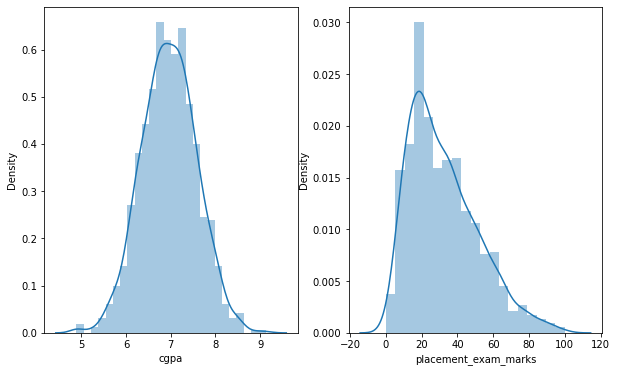

In [95]:
# Distplot - To check the Normality of the data

plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.distplot(placement_data['cgpa'])

plt.subplot(1,2,2)
sns.distplot(placement_data['placement_exam_marks'])
plt.show()

In [96]:
# From the above graph we can conclude that first graph is normally distributed hence we can use Z score test to check the outliers.

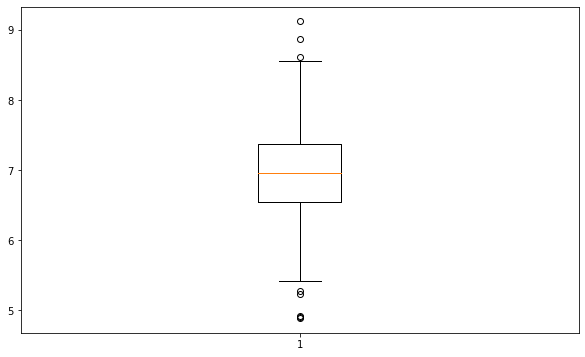

In [97]:
plt.figure(figsize=(10,6))

plt.boxplot(placement_data['cgpa'])
plt.show()

In [98]:
placement_data['cgpa'].skew()

-0.014529938929314918

In [99]:
print('Mean               :- ',placement_data['cgpa'].mean())
print('Standard Deviation :- ',placement_data['cgpa'].std())
print('Minimum value      :- ',placement_data['cgpa'].min())
print('Maximum value      :- ',placement_data['cgpa'].max())

Mean               :-  6.96124000000001
Standard Deviation :-  0.6158978751323894
Minimum value      :-  4.89
Maximum value      :-  9.12


In [100]:
# In Normal Distribution- More than 98% of values falls in +/- 3SD

print('upper Limit is :',placement_data['cgpa'].mean()+3*placement_data['cgpa'].std())
print('lower Limit is :',placement_data['cgpa'].mean()-3*placement_data['cgpa'].std())

upper Limit is : 8.808933625397177
lower Limit is : 5.113546374602842


In [101]:
# Finding the Outliers
placement_data[(placement_data['cgpa']>8.80) | (placement_data['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


## Outliers Handling
1. Data Trimming 
2. Data Capping

## Trimming

In [102]:
new_Placement_data = placement_data[(placement_data['cgpa']<8.80) & (placement_data['cgpa']>5.11)]
new_Placement_data

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


## Capping

In [103]:
upper_limit =placement_data['cgpa'].mean() + 3 * placement_data['cgpa'].std()
lower_limit =placement_data['cgpa'].mean() - 3 * placement_data['cgpa'].std()

In [89]:
print('upper limit is :', upper_limit)
print('lower limit is :', lower_limit)

upper limit is : 8.808933625397177
lower limit is : 5.113546374602842


In [105]:
placement_data['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

In [107]:
placement_data['cgpa']= np.where(
    placement_data['cgpa']>upper_limit,
    upper_limit,
    np.where(placement_data['cgpa']<lower_limit,
             lower_limit,
             placement_data['cgpa']
            )
)

In [109]:
placement_data['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64